# Predicting LendingClub Loan Charge-offs from Loan Origination Data

dataset from lending club on kaggle


## Contents

# 1. Introduction
<a id="1"></a>

[LendingClub](https://www.lendingclub.com/) is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform. As explained by [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club),

> Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

The goal of this project is to build a machine learning model to predict the probability that a loan will charge off. We will attempt to only use data available to investors via the LendingClub loan listing, including information about the borrower (income, employment length, FICO score, debt-to-income ratio, etc.) and the loan listing (the loan amount, loan purpose, loan grade, interest rate, installment, etc.). Such a predictive model could help LendingClub investors make better-informed investment decisions. We will only consider loans that LendingClub accepted under its credit underwriting policy.

## 1.1 References
<a id="1.1"></a>

* LendingClub information
 * [LendingClub website](https://www.lendingclub.com/)
 * [LendingClub Wikipedia page](https://en.wikipedia.org/wiki/Lending_Club)
* Datasets
 * [LendingClub statistics](https://www.lendingclub.com/info/download-data.action) - Original data source, aggregated on Kaggle
 * [All Lending Club loan data](https://www.kaggle.com/wordsforthewise/lending-club) - The dataset used in this project, hosted on Kaggle
 * [Lending Club Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data) - Another LendingClub dataset on Kaggle, not used in this project
* This project
 * [Kaggle notebook](https://www.kaggle.com/pileatedperch/predicting-charge-off-from-initial-listing-data)
 * [GitHub repo](https://github.com/jgcorliss/lending-club)

# 2. Import the Data
<a id="2"></a>

In [444]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Read the data into a pandas dataframe:

In [445]:
loans = pd.read_csv('../Dataset/accepted_2007_to_2018Q4.csv.gz')

e:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Check basic dataframe info:

In [446]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


There are 1.6 million rows and 150 variables. The size of the dataset is 1.8 GB.

Let's peek at 5 randomly selected rows. Each row corresponds to a single loan.

In [447]:
loans.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
991573,75790063,NaN,3025.0,3025.0,3025.0,36 months,16.29,106.79,D,D1,Assets Protection Team Lead,7 years,RENT,33000.0,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=75790063,NaN,debt_consolidation,Debt consolidation,306xx,GA,19.09,1.0,Feb-2007,660.0,664.0,0.0,14.0,NaN,7.0,0.0,1521.0,27.2,14.0,w,0.00,0.00,3539.00941,3539.01,3025.00,514.01,0.0,0.0,0.0,Jun-2017,2151.44,NaN,Sep-2018,699.0,695.0,0.0,14.0,1.0,Individual,NaN,NaN,NaN,0.0,394.0,24671.0,0.0,2.0,0.0,1.0,15.0,23150.0,78.0,0.0,0.0,708.0,70.0,5600.0,1.0,0.0,0.0,1.0,4112.0,1653.0,38.8,0.0,0.0,109.0,97.0,35.0,15.0,1.0,35.0,NaN,15.0,NaN,0.0,2.0,3.0,3.0,4.0,7.0,5.0,6.0,3.0,7.0,0.0,0.0,1.0,0.0,92.9,50.0,0.0,0.0,35400.0,24671.0,2700.0,29800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2148232,119986749,NaN,30000.0,30000.0,30000.0,36 months,9.44,960.15,B,B1,Owner,4 years,RENT,65000.0,Verified,Oct-2017,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=119986749,NaN,debt_consolidation,Debt consolidation,352xx,AL,28.07,1.0,Feb-2012,730.0,734.0,1.0,13.0,NaN,15.0,0.0,19756.0,35.0,25.0,w,16883.37,16883.37,16375.15000,16375.15,13116.63,3258.52,0.0,0.0,0.0,Mar-2019,960.15,Apr-2019,Mar-2019,639.0,635.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,45775.0,1.0,2.0,1.0,3.0,1.0,23106.0,59.0,1.0,3.0,8543.0,44.0,56500.0,6.0,6.0,6.0,6.0,3270.0,32844.0,37.6,0.0,0.0,67.0,65.0,12.0,1.0,0.0,19.0,13.0,2.0,13.0,0.0,7.0,7.0,8.0,9.0,8.0,12.0,16.0,7.0,15.0,0.0,0.0,0.0,2.0

#### reduces the dataset to only 10 thousands rows and 150 variables

In [448]:
loans = loans.sample(n=10000, random_state=42)

# 3. Response Variable
<a id="3"></a>

We're going to try to predict the `loan_status` variable. What are the value counts for this variable?

In [449]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             4758
Current                                                3864
Charged Off                                            1210
Late (31-120 days)                                       96
In Grace Period                                          37
Late (16-30 days)                                        26
Does not meet the credit policy. Status:Charged Off       5
Does not meet the credit policy. Status:Fully Paid        4
Name: loan_status, dtype: int64

We're going to try to learn differences in the features between completed loans that have been fully paid or charged off. We won't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [450]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

How many loans remain in the dataset?

In [451]:
loans.shape

(5968, 151)

There are 814,986 loans remaining. Check that the statuses are as expected:

In [452]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     4758
Charged Off    1210
Name: loan_status, dtype: int64

Status counts as percentages:

In [453]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.797252
Charged Off    0.202748
Name: loan_status, dtype: float64

About 79% of the remaining loans have been fully paid and 21% have charged off, so we have a somewhat unbalanced classification problem.

# 4. Limit the Feature Space
<a id="4"></a>

The full dataset has 150 features for each loan. We'll select features in two steps:

1. Drop features with more than 30% of their data missing.
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

Definitions of the features are given in the LendingClub Data Dictionary [available here](https://www.lendingclub.com/info/download-data.action).

## 4.1 Drop features missing more than 30% data
<a id="4.1"></a>

First calculate the percentage of missing data for each feature:

In [454]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False)

Top 10 features missing the most data:

In [455]:
missing_fractions.head(10)

next_pymnt_d                                  1.000000
member_id                                     1.000000
orig_projected_additional_accrued_interest    0.996984
hardship_start_date                           0.994973
hardship_length                               0.994973
hardship_type                                 0.994973
hardship_reason                               0.994973
hardship_status                               0.994973
deferral_term                                 0.994973
hardship_amount                               0.994973
dtype: float64

Let's visualize the distribution of missing data percentages:

Text(0, 0.5, 'Feature count')

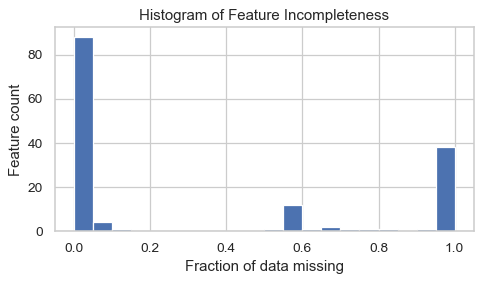

In [456]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

From the above histogram, we see there's a large gap between features missing "some" data (&lt;20%) and those missing "lots" of data (&gt;40%). Because it's generally very difficult to accurately impute data with more than 30% missing values, we drop such columns. First store all variables missing more than 30% data in an alphabetical list:

In [457]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

How many features will be dropped?

In [458]:
len(drop_list)

58

Drop these features:

In [459]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [460]:
loans.shape

(5968, 93)

## 4.2 Only keep loan features known to potential investors
<a id="4.2"></a>

We examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features we currently have, in alphabetical order:

In [461]:
print(sorted(loans.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. These include features in the loan application, and any features added by LendingClub when the loan listing was accepted, such as the loan grade and interest rate.

I'm using my best available knowledge to determine which loan features are known to potential investors. I am not an investor on LendingClub, so my knowledge of the LendingClub investment process is not exact. When in doubt, I err on the side of dropping the feature.

In [462]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [463]:
len(keep_list)

31

The list of features to drop is any feature not in `keep_list`:

In [464]:
drop_list = [col for col in loans.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc

In [465]:
len(drop_list)

62

Drop these features:

In [466]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [467]:
loans.shape

(5968, 31)

# 5. Pre-processing and Exploratory Analysis
<a id="5"></a>

We'll inspect each feature individually, and do the following:

1. Drop the feature if it is not useful for predicting the loan status.
2. View summary statistics and visualize the data, plotting against the loan status.
3. Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the loan status:

In [468]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

Print the remaining features for future reference:

In [469]:
print(list(loans.columns))

['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


## 5.1 id

Data Dictionary: "A unique [LendingClub] assigned ID for the loan listing."

In [470]:
loans['id'].sample(5)

1641298       522904
650767     112053507
690406      79131645
1190273     27612473
1319143     12468579
Name: id, dtype: object

Are all the IDs unique?

In [471]:
loans['id'].describe()

count         5968
unique        5968
top       16411620
freq             1
Name: id, dtype: int64

Yes, they are all unique. The ID is not useful for modeling, either as a categorical variable (there are too many distinct values) or as a numerical variable (the IDs vary wildly in magnitude, likely without any significance), so we drop this variable.

In [472]:
loans.drop('id', axis=1, inplace=True)

## 5.2 loan_amnt

Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [473]:
loans['loan_amnt'].describe()

count     5968.000000
mean     14249.350704
std       8718.253759
min       1000.000000
25%       7500.000000
50%      12000.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

Loan amounts range from \$500 to \$40,000, with a median of \$12,000.

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


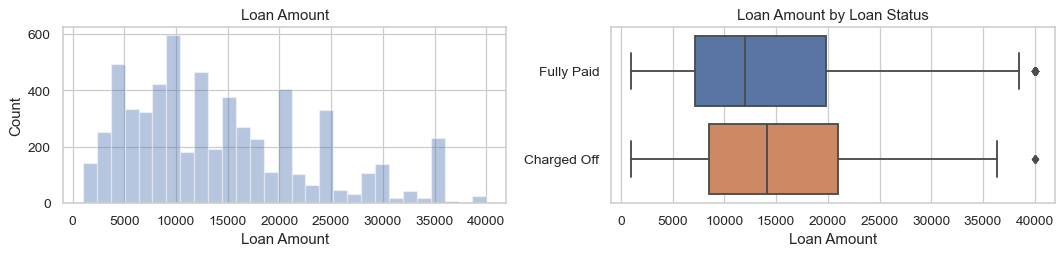

In [474]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

Charged-off loans tend to have higher loan amounts. Let's compare the summary statistics by loan status:

In [475]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,15509.318182,8919.267154,1000.0,8543.75,14125.0,21000.00,40000.0
Fully Paid,4758.0,13928.930223,8638.076610,1000.0,7200.00,12000.0,19856.25,40000.0


## 5.3 term

Data Dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."

In [476]:
loans['term'].value_counts(dropna=False)

 36 months    4522
 60 months    1446
Name: term, dtype: int64

Convert `term` to integers.

In [477]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))

In [478]:
loans['term'].value_counts(normalize=True)

36    0.757708
60    0.242292
Name: term, dtype: float64

Compare the charge-off rate by loan period:

In [479]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.160106
60    0.336100
Name: loan_status, dtype: float64

About 76% of the completed loans have three-year periods, and the rest have five-year periods. Loans with five-year periods are more than twice as likely to charge-off as loans with three-year periods.

## 5.4 int_rate

Data Dictionary: "Interest Rate on the loan."

In [480]:
loans['int_rate'].describe()

count    5968.000000
mean       13.252567
std         4.835254
min         5.310000
25%         9.710000
50%        12.690000
75%        15.990000
max        30.990000
Name: int_rate, dtype: float64

Interest rates range from 5.32% to 30.99% (!) with a median of 13.1%.

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


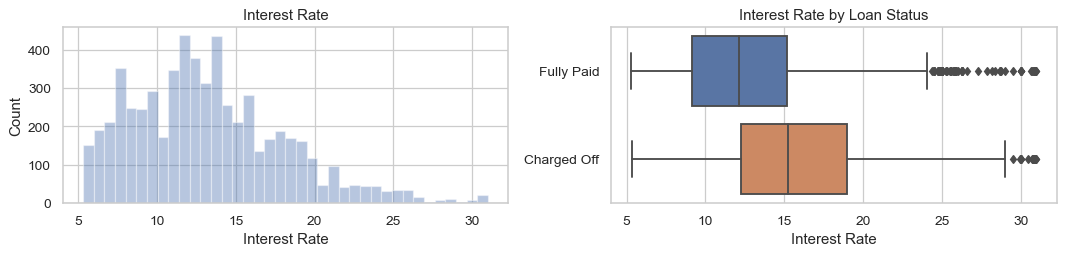

In [481]:
plot_var('int_rate', 'Interest Rate', continuous=True)

Charged-off loans tend to have much higher interest rates. Let's compare the summary statistics by loan status:

In [482]:
loans.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,15.847843,5.052813,5.32,12.29,15.27,18.9900,30.94
Fully Paid,4758.0,12.592566,4.548507,5.31,9.17,12.12,15.2075,30.99


## 5.5 installment

Data Dictionary: "The monthly payment owed by the borrower if the loan originates."

In [483]:
loans['installment'].describe()

count    5968.000000
mean      432.456696
std       260.976839
min        23.010000
25%       241.270000
50%       369.000000
75%       575.510000
max      1714.540000
Name: installment, dtype: float64

Installments range from \$4.93 to \$1,714, with a median of \$377.

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


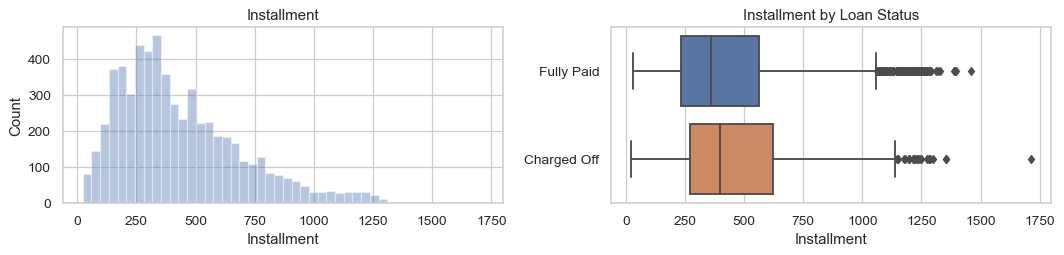

In [484]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [485]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,462.888554,266.558013,23.01,270.69,398.49,621.0175,1714.54
Fully Paid,4758.0,424.717615,258.997043,30.54,232.98,359.80,563.2300,1460.81


Loans that charge off have \$30 higher installments on average.

## 5.6 grade, sub_grade

Data Dictionary for `grade`: "LendingClub assigned loan grade."

Data Dictionary for `sub_grade`: "LendingClub assigned loan subgrade."

What are the possible values of `grade` and `sub_grade`?

In [486]:
print(sorted(loans['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [487]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


The grade is implied by the subgrade, so let's drop the grade column.

In [488]:
loans.drop('grade', axis=1, inplace=True)

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


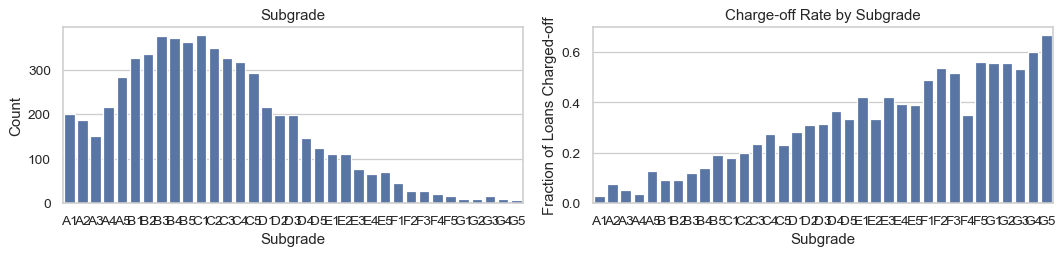

In [489]:
plot_var('sub_grade', 'Subgrade', continuous=False)

There's a clear trend of higher probability of charge-off as the subgrade worsens.

## 5.7 emp_title

Data Dictionary: "The job title supplied by the Borrower when applying for the loan."

In [490]:
loans['emp_title'].describe()

count        5577
unique       3873
top       Teacher
freq           82
Name: emp_title, dtype: object

There are too many different job titles for this feature to be useful, so we drop it.

In [491]:
loans.drop(labels='emp_title', axis=1, inplace=True)

## 5.8 emp_length

Data Dictionary: "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years." The actual data does not match this description:

In [492]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year        427
10+ years    1875
2 years       578
3 years       443
4 years       340
5 years       389
6 years       305
7 years       286
8 years       271
9 years       220
< 1 year      480
NaN           354
Name: emp_length, dtype: int64

Note there are 42,253 loans without data on the length of employment.

Convert `emp_length` to integers:

In [493]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [494]:
loans['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [495]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [496]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [497]:
loans['emp_length'].value_counts(dropna=False).sort_index()

0.0      480
1.0      427
2.0      578
3.0      443
4.0      340
5.0      389
6.0      305
7.0      286
8.0      271
9.0      220
10.0    1875
NaN      354
Name: emp_length, dtype: int64

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


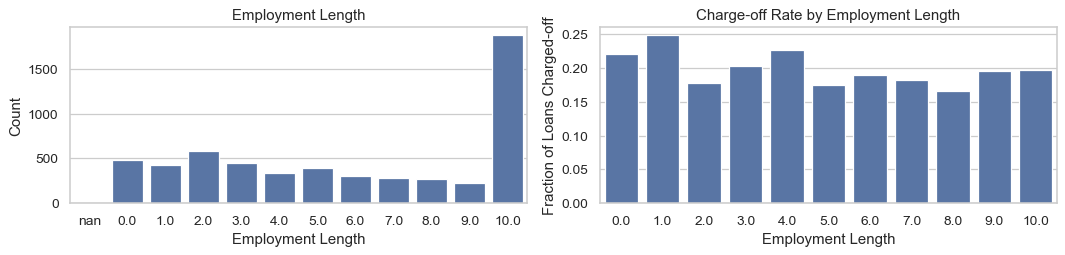

In [498]:
plot_var('emp_length', 'Employment Length', continuous=False)

Loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

## 5.9 home_ownership

Data Dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [499]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    2912
RENT        2425
OWN          628
ANY            2
NONE           1
Name: home_ownership, dtype: int64

Replace the values `ANY` and `NONE` with `OTHER`:

In [500]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [501]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    2912
RENT        2425
OWN          628
OTHER          3
Name: home_ownership, dtype: int64

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


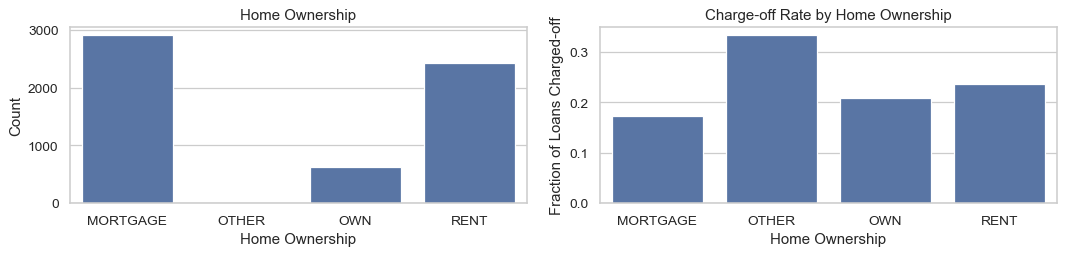

In [502]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appear to be large differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [503]:
loans.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.173764
OTHER       0.333333
OWN         0.208599
RENT        0.235876
Name: loan_status, dtype: float64

## 5.10 annual_inc

Data Dictionary: "The self-reported annual income provided by the borrower during registration."

In [504]:
loans['annual_inc'].describe()

count    5.968000e+03
mean     7.615363e+04
std      6.539994e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      3.200000e+06
Name: annual_inc, dtype: float64

Annual income ranges from \$0 to \$9,550,000, with a median of \$65,000. Because of the large range of incomes, we should take a log transform of the annual income variable.

In [505]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [506]:
loans.drop('annual_inc', axis=1, inplace=True)

In [507]:
loans['log_annual_inc'].describe()

count    5968.000000
mean        4.811048
std         0.245743
min         0.000000
25%         4.653222
50%         4.812920
75%         4.954247
max         6.505150
Name: log_annual_inc, dtype: float64

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


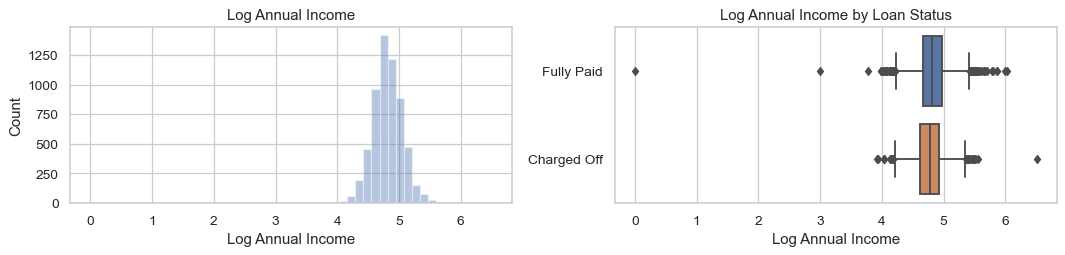

In [508]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

It appears that individuals with higher income are more likely to pay off their loans. Let's compare the summary statistics by loan status:

In [509]:
loans.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,4.774456,0.239274,3.924331,4.623260,4.778158,4.919867,6.50515
Fully Paid,4758.0,4.820354,0.246521,0.000000,4.672107,4.812920,4.970584,6.02119


## 5.11 verification_status

Data Dictionary: "Indicates if income was verified by [Lending Club], not verified, or if the income source was verified."

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


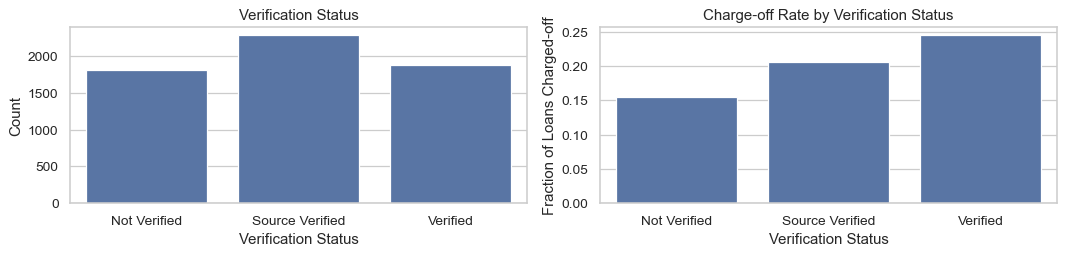

In [510]:
plot_var('verification_status', 'Verification Status', continuous=False)

## 5.12 issue_d

Data Dictionary: "The month which the loan was funded."

Because we're only using variables available to investors before the loan was funded, `issue_d` will not be included in the final model. We're keeping it for now just to perform the train/test split later, then we'll drop it.

## 5.13 purpose

Data Dictionary: "A category provided by the borrower for the loan request."

In [511]:
loans['purpose'].value_counts()

debt_consolidation    3476
credit_card           1292
home_improvement       378
other                  342
major_purchase         151
small_business          71
medical                 70
car                     60
moving                  49
vacation                37
house                   23
wedding                 11
renewable_energy         5
educational              3
Name: purpose, dtype: int64

Calculate the charge-off rates by purpose:

In [512]:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.090909
car                   0.150000
credit_card           0.157895
house                 0.173913
home_improvement      0.177249
moving                0.183673
major_purchase        0.205298
other                 0.213450
debt_consolidation    0.218067
vacation              0.243243
medical               0.271429
educational           0.333333
small_business        0.352113
Name: loan_status, dtype: float64

Notice that only 12% of completed loans for weddings have charged-off, but 30% of completed small business loans have charged-off.

## 5.14 title

Data Dictionary: "The loan title provided by the borrower."

In [513]:
loans['title'].describe()

count                   5905
unique                   594
top       Debt consolidation
freq                    2936
Name: title, dtype: object

View the top 10 loan titles, and their frequencies:

In [514]:
loans['title'].value_counts().head(10)

Debt consolidation         2936
Credit card refinancing    1095
Home improvement            333
Other                       293
Major purchase              131
Debt Consolidation           71
Medical expenses             65
Business                     55
Moving and relocation        43
Car financing                41
Name: title, dtype: int64

There are 60,298 different titles in the dataset, and based on the top 10 titles, the `purpose` variable appears to already contain this information. So we drop the `title` variable.

In [515]:
loans.drop('title', axis=1, inplace=True)

## 5.15 zip_code, addr_state

Data Dictionary for `zip_code`: "The first 3 numbers of the zip code provided by the borrower in the loan application."

Data Dictionary for `addr_state`: "The state provided by the borrower in the loan application."

In [516]:
loans['zip_code'].sample(5)

381812     494xx
1754470    334xx
539023     891xx
1318341    450xx
79384      206xx
Name: zip_code, dtype: object

In [517]:
loans['zip_code'].nunique()

730

In [518]:
loans['addr_state'].sample(5)

152614     LA
1056393    NC
1896462    FL
5498       VA
913328     CA
Name: addr_state, dtype: object

In [519]:
loans['addr_state'].nunique()

50

There are a lot of different zip codes, so let's just keep the state column.

In [520]:
loans.drop(labels='zip_code', axis=1, inplace=True)

Calculate the charge-off rates by address state:

In [521]:
loans.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
NH    0.050000
MT    0.095238
WY    0.100000
DC    0.100000
OR    0.116883
SC    0.144737
CO    0.148760
LA    0.149254
AR    0.153846
MS    0.161290
RI    0.166667
NE    0.166667
AZ    0.170588
UT    0.171429
GA    0.180905
VA    0.181208
MO    0.181818
KS    0.185185
MD    0.185714
IL    0.188596
HI    0.189189
CA    0.190583
CT    0.202381
KY    0.203125
IN    0.203125
MN    0.205128
FL    0.208426
OH    0.211340
MI    0.212766
NC    0.218182
PA    0.219388
TX    0.219565
NJ    0.220657
WV    0.222222
NY    0.225049
WA    0.232759
TN    0.235955
NV    0.236559
WI    0.242857
AK    0.250000
ND    0.250000
AL    0.268657
MA    0.276119
OK    0.285714
NM    0.314286
DE    0.315789
Name: loan_status, dtype: float64

The charge-off rate ranges from 13.0% in Washington, DC to 27.6% in Mississippi.

## 5.16 dti

Data Dictionary: "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

In [522]:
loans['dti'].describe()

count    5967.000000
mean       18.281865
std        12.878504
min         0.000000
25%        11.655000
50%        17.460000
75%        24.010000
max       697.040000
Name: dti, dtype: float64

Note sure if the values of -1 and 999 make sense...

There are several outliers that mess up our default plots. Plot a histogram for `dti` less than 60:

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

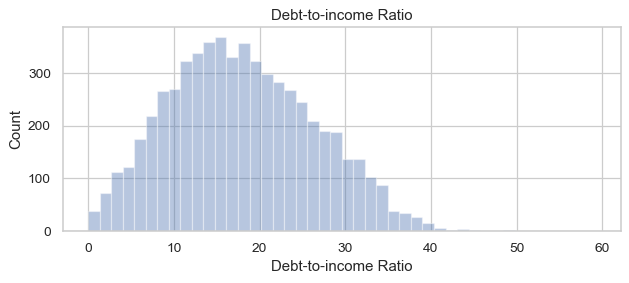

In [523]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loans.loc[loans['dti'].notnull() & (loans['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

How many of the `dti` values are "outliers" (above 60)?

In [524]:
(loans['dti']>=60).sum()

15

Very few. Compare the summary statistics by loan status:

In [525]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,20.25962,9.845124,0.0,13.5025,20.1,26.6075,108.14
Fully Paid,4757.0,17.77880,13.496840,0.0,11.3000,16.8,23.1300,697.04


Completed loans that are charged off tend to have higher debt-to-income ratios.

## 5.17 earliest_cr_line

Data Dictionary: "The month the borrower's earliest reported credit line was opened."

In [526]:
loans['earliest_cr_line'].sample(5)

692785     May-2003
1157495    May-2002
2178349    Jul-1981
956173     Jul-2000
43429      Jun-1990
Name: earliest_cr_line, dtype: object

In [527]:
loans['earliest_cr_line'].isnull().any()

False

Let's just retain the year for simplicity:

In [528]:
loans['earliest_cr_line'] = loans['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [529]:
loans['earliest_cr_line'].describe()

count    5968.000000
mean     1998.800101
std         7.663272
min      1955.000000
25%      1995.000000
50%      2000.000000
75%      2004.000000
max      2014.000000
Name: earliest_cr_line, dtype: float64

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


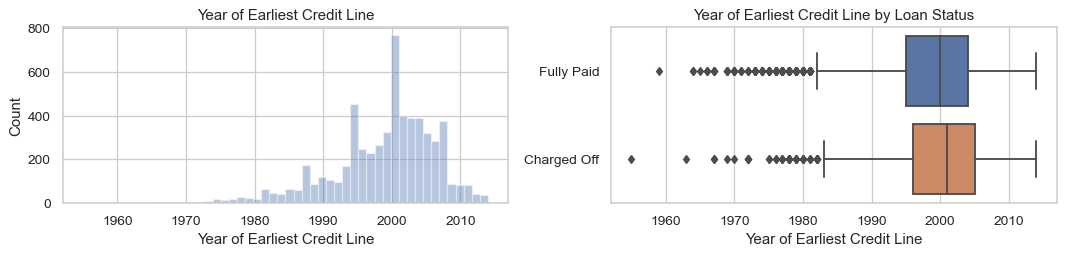

In [530]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

Borrowers who are charged-off tend to have shorter lines of credit.

## 5.18 fico_range_low, fico_range_high

Data Dictionary for `fico_range_low`: "The lower boundary range the borrower’s FICO at loan origination belongs to."

Data Dictionary for `fico_range_high`: "The upper boundary range the borrower’s FICO at loan origination belongs to."

In [531]:
loans[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,5968.000000,5968.000000
mean,696.347185,700.347185
std,32.152849,32.152849
min,660.000000,664.000000
25%,670.000000,674.000000
50%,690.000000,694.000000
75%,710.000000,714.000000
max,830.000000,834.000000


Check the Pearson correlation between these values:

In [532]:
loans[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


We only need to keep one of the FICO scores. We'll take the average of the two and call it `fico_score`:

In [533]:
loans['fico_score'] = 0.5*loans['fico_range_low'] + 0.5*loans['fico_range_high']

In [534]:
loans.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


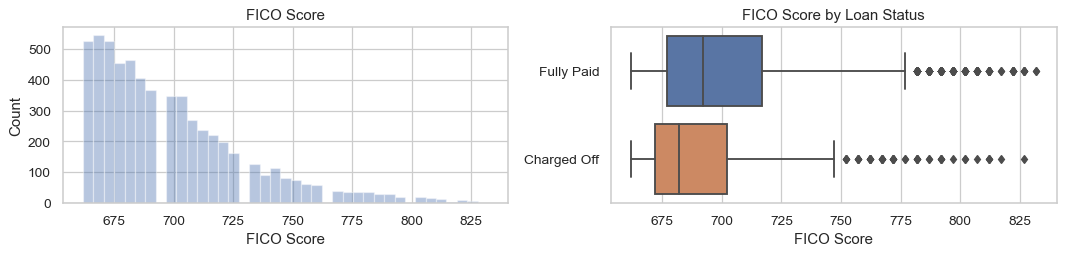

In [535]:
plot_var('fico_score', 'FICO Score', continuous=True)

There is a noticeable difference in FICO scores between fully paid and charged-off loans. Compare the summary statistics:

In [536]:
loans.groupby('loan_status')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,690.714876,27.320762,662.0,672.0,682.0,702.0,827.0
Fully Paid,4758.0,700.288146,32.992065,662.0,677.0,692.0,717.0,832.0


Loans that charge off have a FICO score 10 points lower on average.

## 5.19 open_acc

Data Dictionary: "The number of open credit lines in the borrower's credit file."

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Open Credit Lines')

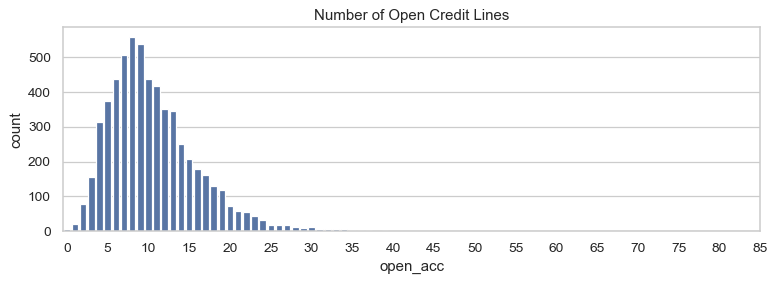

In [537]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loans['open_acc'], order=sorted(loans['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

Is there a difference in number of credit lines between fully paid loans and charged-off loans?

In [538]:
loans.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,11.877686,5.644551,1.0,8.0,11.0,15.0,45.0
Fully Paid,4758.0,11.457125,5.407093,1.0,8.0,10.0,14.0,45.0


There's does not appear to be a significant difference.

## 5.20 pub_rec

Data Dictionary: "Number of derogatory public records."

In [539]:
loans['pub_rec'].value_counts().sort_index()

0.0     4990
1.0      828
2.0       95
3.0       36
4.0        6
5.0        5
6.0        4
7.0        2
9.0        1
11.0       1
Name: pub_rec, dtype: int64

Is there a difference in average public records between fully paid loans and charged-off loans?

In [540]:
loans.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,0.223967,0.553435,0.0,0.0,0.0,0.0,5.0
Fully Paid,4758.0,0.202186,0.574765,0.0,0.0,0.0,0.0,11.0


## 5.21 revol_bal

Data Dictionary: "Total credit revolving balance."

In [541]:
loans['revol_bal'].describe()

count      5968.000000
mean      16345.918901
std       22126.271894
min           0.000000
25%        5856.000000
50%       11142.000000
75%       19780.000000
max      390592.000000
Name: revol_bal, dtype: float64

Do a log transform:

In [542]:
loans['log_revol_bal'] = loans['revol_bal'].apply(lambda x: np.log10(x+1))

In [543]:
loans.drop('revol_bal', axis=1, inplace=True)

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


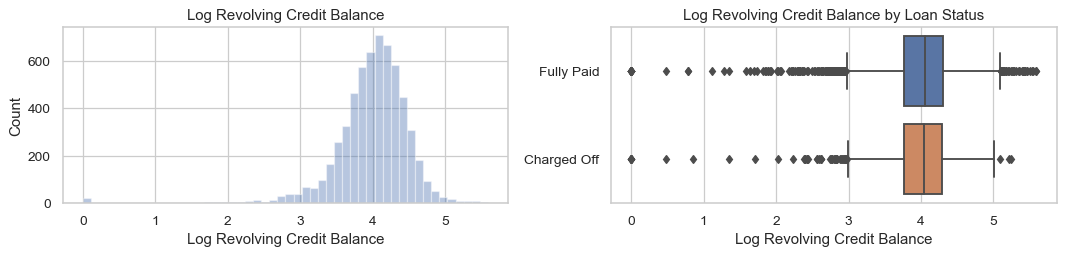

In [544]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

In [545]:
loans.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,3.969690,0.541761,0.0,3.765873,4.042593,4.283612,5.247765
Fully Paid,4758.0,3.998964,0.511003,0.0,3.767916,4.047567,4.298602,5.591724


There isn't a large difference in the means.

## 5.22 revol_util

Data Dictionary: "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

In [546]:
loans['revol_util'].describe()

count    5965.000000
mean       51.789187
std        24.603100
min         0.000000
25%        33.400000
50%        52.300000
75%        70.600000
max       120.200000
Name: revol_util, dtype: float64

e:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


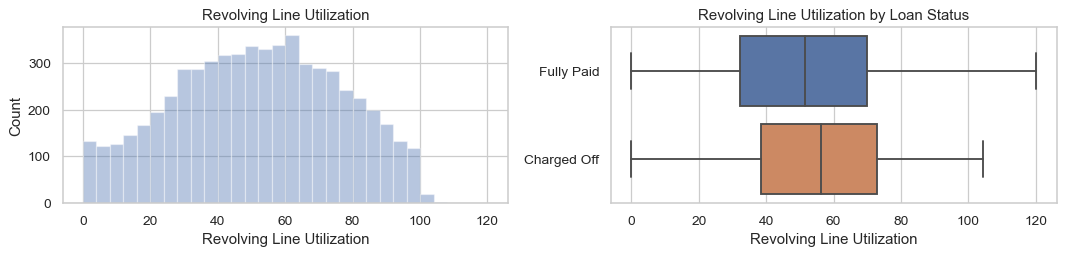

In [547]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

In [548]:
loans.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,54.662397,24.002930,0.0,38.5,56.15,72.8,104.4
Fully Paid,4755.0,51.058044,24.702687,0.0,32.1,51.40,70.0,120.2


## 5.23 total_acc

Data Dictionary: "The total number of credit lines currently in the borrower's credit file."

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Number of Credit Lines')

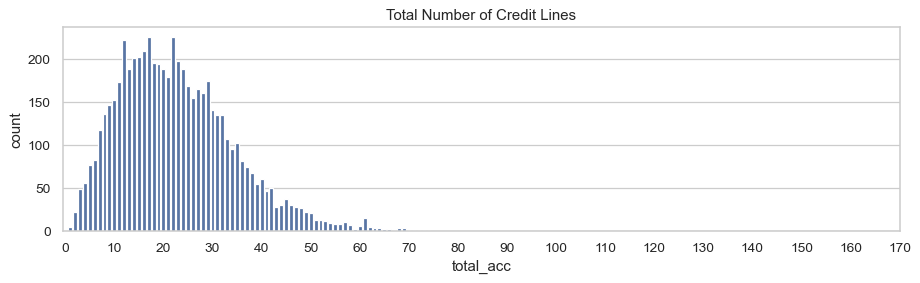

In [549]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(loans['total_acc'], order=sorted(loans['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [550]:
loans.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1210.0,24.936364,12.327758,3.0,16.0,23.0,32.0,93.0
Fully Paid,4758.0,24.562842,11.599355,2.0,16.0,23.0,32.0,97.0


No large differences here.

## 5.24 initial_list_status

Data Dictionary: "The initial listing status of the loan. Possible values are – W, F." I'm not sure what this means.

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


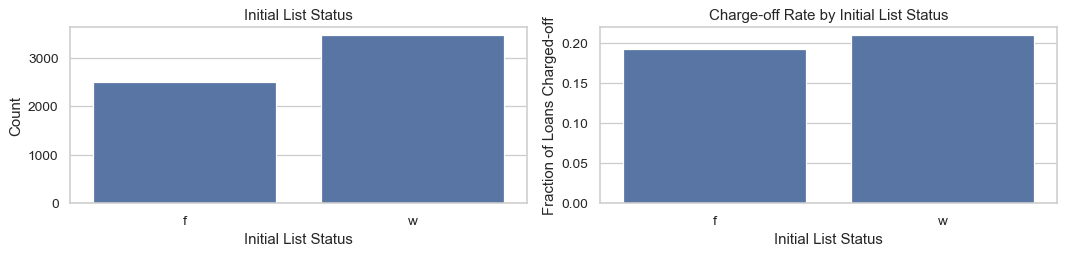

In [551]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

## 5.25 application_type

Data Dictionary: "Indicates whether the loan is an individual application or a joint application with two co-borrowers."

In [552]:
loans['application_type'].value_counts()

Individual    5857
Joint App      111
Name: application_type, dtype: int64

Let's just compare the charge-off rates by application type:

In [553]:
loans.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.201468
Joint App     0.270270
Name: loan_status, dtype: float64

Joint loans are slightly less likely to be charged-off.

## 5.26 mort_acc

Data Dictionary: "Number of mortgage accounts."

In [554]:
loans['mort_acc'].describe()

count    5777.000000
mean        1.615198
std         1.946016
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: mort_acc, dtype: float64

Not sure how someone can have 51 mortgage accounts...but apparently they do. Check the top 10 values:

In [555]:
loans['mort_acc'].value_counts().head(10)

0.0    2368
1.0    1033
2.0     862
3.0     581
4.0     418
5.0     233
6.0     139
7.0      66
8.0      36
9.0      23
Name: mort_acc, dtype: int64

Compare the summary statistics by loan status:

In [556]:
loans.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,1178.0,1.391341,1.824638,0.0,0.0,1.0,2.0,11.0
Fully Paid,4599.0,1.672538,1.972012,0.0,0.0,1.0,3.0,15.0


Individuals who pay off their loans are more likely to have several mortgage accounts.

## 5.27 pub_rec_bankruptcies

Data Dictionary: "Number of public record bankruptcies."

In [557]:
loans['pub_rec_bankruptcies'].value_counts().sort_index()

0.0    5251
1.0     682
2.0      19
3.0       8
5.0       1
6.0       1
Name: pub_rec_bankruptcies, dtype: int64

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


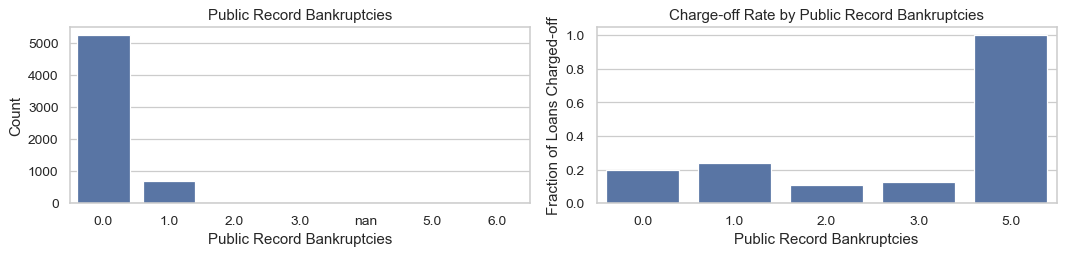

In [558]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

# 6. More Pre-processing
<a id="6"></a>

## 6.1 Convert loan status to 0/1 charge-off indicator
<a id="6.1"></a>

Change the response variable `loan_status` to a 0/1 variable, where 0 indicates fully paid and 1 indicates charge-off:

In [559]:
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

## 6.2 Create dummy variables
<a id="6.2"></a>

How many variables do we currently have?

In [560]:
loans.shape

(5968, 25)

If any categorical variables have missing values, we'll need to create NaN dummy variables for those. So first check which variables have missing data:

In [561]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable

In [562]:
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

emp_length              0.059316
mort_acc                0.032004
pub_rec_bankruptcies    0.001005
revol_util              0.000503
dti                     0.000168
dtype: float64


There are no categorical variables with missing values, and therefore we don't need any `NaN` dummy variables.

Create dummy variables for the categorical variables:

In [563]:
print(loans.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'log_annual_inc', 'fico_score', 'log_revol_bal', 'charged_off'],
      dtype='object')


In [564]:
loans = pd.get_dummies(loans, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type'], drop_first=True)

How many variables are there now?

In [565]:
loans.shape

(5968, 121)

Check our data with the new dummy variables:

In [566]:
loans.sample(5)

,loan_amnt,term,int_rate,installment,emp_length,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
1200871,10000.0,36,8.39,315.17,2.0,Sep-2014,11.69,2006,19.0,2.0,48.7,24.0,0.0,1.0,4.763435,687.0,3.904932,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
578305,8400.0,36,7.97,263.11,8.0,Aug-2017,18.63,1999,8.0,1.0,0.1,19.0,0.0,1.0,4.623260,687.0,1.342423,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
682046,16000.0,36,23.32,622.03,10.0,Jun-2016,32.54,2007,15.0,0.0,87.2,43.0,1.0,0.0,4.792399,672.0,4.292788,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1077283,7000.0,36,8.39,220.62,5.0,Feb-2016,10.54,1995,13.0,1.0,31.4,32.0,0.0,1.0,4.913819,672.0,3.980957,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1812281,16000.0,60,15.22,382.49,10.0,Aug-2013,6.01,1995,4.0,0.0,84.0,26.0,9.0,0.0,4.933953,687.0,3.577722,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 6.3 Train/test split
<a id="6.3"></a>

We'll make our modeling problem more realistic by performing the train/test split based on the month that the loan was funded. That is, we'll use loans funded on earlier dates to predict whether future loans will charge-off. The variable `issue_d` includes the month and year that the loan was funded.

In [567]:
loans['issue_d'].sample(5)

383017     Feb-2015
1757457    Dec-2013
168628     Aug-2015
1870672    Mar-2013
1789308    Oct-2013
Name: issue_d, dtype: object

Are there any missing values?

In [568]:
loans['issue_d'].isnull().any()

False

No. Let's convert the issue dates to datetime objects:

In [569]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'])

In [570]:
loans['issue_d'].sample(5)

1878991   2013-01-01
1614272   2011-11-01
1026142   2016-03-01
226524    2015-07-01
1853827   2013-05-01
Name: issue_d, dtype: datetime64[ns]

The new datetime values are all on the first day of the month. Check the summary statistics of the issue dates:

In [571]:
loans['issue_d'].describe()

C:\Users\user\AppData\Local\Temp/ipykernel_20040/2940031951.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loans['issue_d'].describe()


count                    5968
unique                    129
top       2015-07-01 00:00:00
freq                      194
first     2007-08-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

There are only 124 unique issue dates over the 10-year period because we only have month/year information. In this particular dataset, the first loans were issued in June 2007, and the most recent loans were issued in September 2017. The busiest month was October 2014 with 33,699 loans funded in that month. What is the distribution of loans funded in each year?

Text(0.5, 1.0, 'Loans Funded per Year')

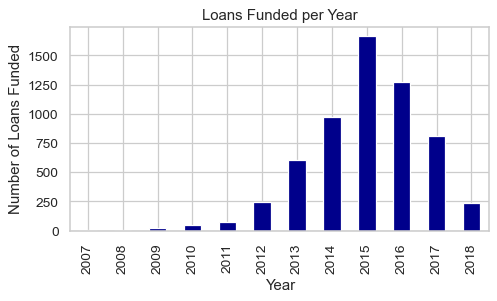

In [572]:
plt.figure(figsize=(6,3), dpi=90)
loans['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

We'll form the test set from the most recent 10% of the loans.

In [573]:
loans_train = loans.loc[loans['issue_d'] <  loans['issue_d'].quantile(0.9)]
loans_test =  loans.loc[loans['issue_d'] >= loans['issue_d'].quantile(0.9)]

Check that we properly partitioned the loans:

In [574]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', loans.shape[0])

Number of loans in the partition:    5968
Number of loans in the full dataset: 5968


What is the test size?

In [575]:
loans_test.shape[0] / loans.shape[0]

0.1107573726541555

About 10.2%. The partition looks good, so we can delete the original `loans` dataframe:

In [576]:
del loans

Let's look at the summary statistics of the issue dates in the train and test sets:

In [577]:
loans_train['issue_d'].describe()

C:\Users\user\AppData\Local\Temp/ipykernel_20040/1587581987.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loans_train['issue_d'].describe()


count                    5307
unique                    110
top       2015-07-01 00:00:00
freq                      194
first     2007-08-01 00:00:00
last      2017-05-01 00:00:00
Name: issue_d, dtype: object

In [578]:
loans_test['issue_d'].describe()

C:\Users\user\AppData\Local\Temp/ipykernel_20040/4293394310.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loans_test['issue_d'].describe()


count                     661
unique                     19
top       2017-06-01 00:00:00
freq                       77
first     2017-06-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

The training set includes loans from June 2007 to June 2016. The test set includes loans from July 2016 to September 2017.

Now we need to delete the `issue_d` variable, because it was not available before the loan was funded.

In [579]:
loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

Now separate the predictor variables from the response variable:

In [580]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [581]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [582]:
del loans_train, loans_test

# 7. Linear Dependence of Charge-off on the Predictors
<a id="7"></a>

On the training set, we compute the Pearson correlation, $F$-statistic, and $p$ value of each predictor with the response variable `charged_off`.

In [583]:
linear_dep = pd.DataFrame()

Pearson correlations:

In [584]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

$F$-statistics:

In [585]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), y_train.loc[mask])

Sort the results by the absolute value of the Pearson correlation:

In [586]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)

Reset the index:

In [587]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)

View the results for the top 20 predictors most correlated with `charged_off`:

In [588]:
linear_dep.head(20)

,variable,pearson_corr,F,p_value
0,int_rate,0.278126,444.767436,7.079333e-95
1,term,0.195168,210.065353,0.000000e+00
2,fico_score,-0.123104,81.632493,2.253567e-19
3,dti,0.119803,77.249626,2.004834e-18
4,log_annual_inc,-0.081493,35.466648,2.761358e-09
5,sub_grade_A4,-0.077755,32.267891,1.414645e-08
6,sub_grade_E1,0.076125,30.921350,2.818417e-08
7,verification_status_Verified,0.070012,26.131603,3.301145e-07
8,sub_grade_B2,-0.069761,25.943394,3.637424e-07
9,sub_grade_B1,-0.068649,25.119041,5.564882e-07


The variables most linearly correlated with `charged_off` are the interest rate, loan period (term), FICO score, debt-to-income ratio, number of mortgages, income, the loan grade, and the loan amount.

Now view the results for the 20 least correlated predictors:

In [589]:
linear_dep.tail(20)

,variable,pearson_corr,F,p_value
99,addr_state_VA,-0.007130,0.269720,0.603541
100,addr_state_NJ,0.006822,0.246912,0.619279
101,addr_state_MD,-0.006611,0.231897,0.630140
102,addr_state_NC,0.006107,0.197856,0.656475
103,purpose_house,-0.005668,0.170410,0.679765
104,purpose_major_purchase,0.005621,0.167635,0.682238
105,addr_state_MI,0.005621,0.167635,0.682238
106,home_ownership_OWN,0.004166,0.092074,0.761569
107,addr_state_UT,-0.003554,0.067020,0.795736
108,addr_state_WI,0.003496,0.064833,0.799023


It looks like the borrower's state of residence, the revolving balance, and several of the loan purposes are irrelevant for predicting charge-off.

# 8. Model Training and Testing
<a id="8"></a>

We implement machine learning pipelines consisting of one or more of the following steps, depending on the particular model:
1. Mean imputation of missing values
2. Dimension reduction using linear discriminant analysis (LDA)
3. Data standardization: rescaling to zero mean and unit variance
4. The chosen model

We will evaluate and compare the following models using a cross-validated AUROC score on the training set:
1. SGD training
2. Random forest
3. k-nearest neighbors

We'll perform some hyperparameter tuning for each model to choose the most promising model, then more carefully tune the hyperparameters of the best-performing model.

In [590]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

## 8.1 SGD training
<a id="8.1"></a>

The `SGDClassifier` estimator in scikit-learn implements linear classifiers (SVM, logistic regression, and others) with stochastic gradient descent (SGD) training.

In [591]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [592]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # or 'median' or 'most_frequent'

# Fit the imputer on the training data and transform X_train
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

# Now you can proceed with fitting the model


In [594]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score

sgd = SGDClassifier()
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
cv = GridSearchCV(sgd, param_grid, n_jobs=-1,verbose =1)
result = cv.fit(X_train_imputed, y_train)

print('\noptimal learning rate = {}'.format(result.best_params_))

sgd_model = result.best_estimator_


sgd_predict = sgd_model.predict(X_test_imputed)
sgd_acc = accuracy_score(y_test, sgd_predict)
print('\nAccuracy: {}'.format(sgd_acc))

SGD_AUC = roc_auc_score(y_test, sgd_predict) 
print("AUC: " + str(SGD_AUC))

Fitting 5 folds for each of 7 candidates, totalling 35 fits



optimal learning rate = {'alpha': 10}

Accuracy: 0.22239031770045387
AUC: 0.5175103695324283


## 8.2 Random forest classifier
<a id="8.2"></a>

Next we train a random forest model. Note that data standardization is not necessary for a random forest.

In [595]:
from sklearn.ensemble import RandomForestClassifier

In [596]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_imputed, y_train)
RandomForest_Predict = RandomForest.predict(X_test_imputed)
RandomForest_Accuracy = accuracy_score(y_test, RandomForest_Predict)
print("Accuracy: " + str(RandomForest_Accuracy))

RF_AUC = roc_auc_score(y_test, RandomForest_Predict) 
print("AUC: " + str(RF_AUC))

Accuracy: 0.8184568835098336
AUC: 0.5341408999497235


## 8.3 k-nearest neighbors
<a id="8.3"></a>

Next we try k-nearest neighbors. We need to reduce the number of variables to 10 or fewer ([reference](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#Dimension_reduction)) for kNN to perform well. 

In [597]:
from sklearn.neighbors import KNeighborsClassifier

In [600]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train_imputed, y_train)
KNN_Predict = KNN_Model.predict(X_test_imputed)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_test, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7639939485627837
AUC: 0.4943438914027149


Mean cross-validated AUROC score of the best model:

Best hyperparameters:

Only 3 LDA components are necessary for kNN to perform almost as well as logistic regression.

## 8.4 Model Comparison
<a id="8.4"></a>

The three models performed quite similarly according to the AUROC:

In [605]:
model_performance_accuracy = pd.DataFrame({'Model': ['KNeighborsClassifier','SGDClassifier','RandomForestClassifier'],
                                                      
                                            'Accuracy': [KNN_Accuracy,sgd_acc, KNN_Accuracy],
                                      
                                             'F1_Score': [f1_score(y_test, KNN_Predict),
                                                           f1_score(y_test, sgd_predict),
                                                            f1_score(y_test, RandomForest_Predict),] })

In [606]:
model_performance_accuracy.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,F1_Score
0,KNeighborsClassifier,0.763994,0.103448
2,RandomForestClassifier,0.763994,0.154930
1,SGDClassifier,0.222390,0.307278


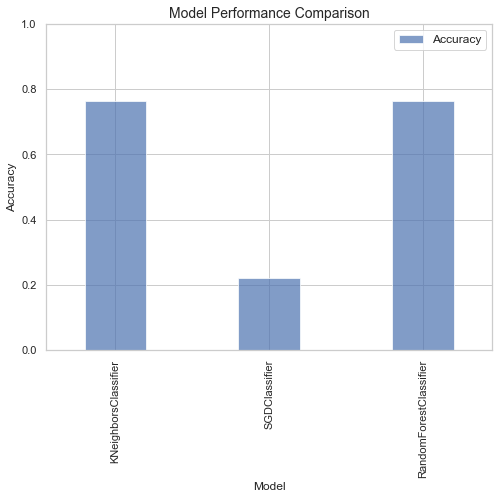

In [607]:
# Create a bar chart of model performance
fig, ax = plt.subplots(figsize=(8,6))
model_performance_accuracy.plot(kind='bar', x='Model', y='Accuracy', 
                                ax=ax, color='b', alpha=0.7, legend=False, width=0.4)

# Add labels and titles
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.legend(['Accuracy'], fontsize=12)
ax.set_ylim([0,1])

plt.show()

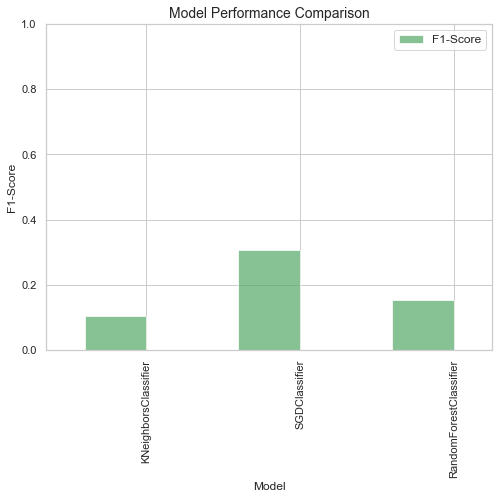

In [608]:
fig, ax = plt.subplots(figsize=(8,6))
model_performance_accuracy.plot(kind='bar', x='Model', y='F1_Score', 
                                ax=ax, color='g', alpha=0.7, legend=False, width=0.4, position=1)

# Add labels and titles
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.legend(['F1-Score'], fontsize=12)
ax.set_ylim([0,1])

plt.show()